### 가설검정 연습문제

문제 1
당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다.

이 식빵의 무게는 500g이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 500g이 맞는지 의구심이 들기 시작한다. 그래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 아래의 데이터와 같다.

https://data.hossam.kr/E02/bread.xlsx

1개월간 측정한 빵의 평균 무게는 495.3g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

요구사항

1. 빵 무게의 95% 신뢰구간을 구하고 시각화 하시오.

2. 지금까지 당신이 구입한 빵의 평균 무게가 500g보다 작다면 컴플레인을 걸고자 한다. 컴플레인을 걸어야 할지 결정하시오.

In [1]:
from pandas import read_excel
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sb
from math import sqrt
import os
import sys

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import get_confidence_interval

In [2]:
df = read_excel("https://data.hossam.kr/E02/bread.xlsx")
df

,무게
0,495
1,496
2,502
3,494
4,499
5,501
6,493
7,494
8,495
9,501


In [3]:
clevel = 0.95 # 신뢰수준
n = len(df['무게']) # 샘플사이즈
dof = n-1 # 자유도
sample_mean = df['무게'].mean() # 표본평균
sample_std = df['무게'].std(ddof=1) # 표본 표준 편차 
sample_std_error = sample_std/sqrt(n) # 표본 표준오차

In [4]:
# 신뢰구간
cmin, cmax = t.interval(clevel,dof,loc=sample_mean,scale=sample_std_error)
cmin, cmax

(494.03836792675105, 496.6949654065823)

In [5]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

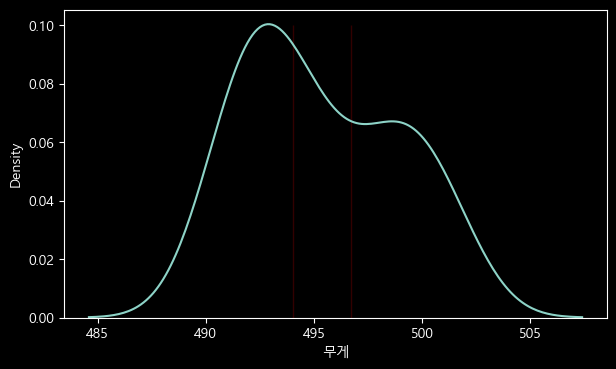

In [6]:
sb.kdeplot(data=df,x='무게')
sb.lineplot(x=[cmin,cmin],y=[0,0.1],color = 'red')
sb.lineplot(x=[cmax,cmax],y=[0,0.1],color = 'red')
plt.show()
plt.close()

내가 빵을 샀을 때, 95%의 확률로 이 사이에 위치함 (494~496g) 달려가서 컴플레인을 건다. 그러나 빵은 보관 상태에 따라서 수분이 날아갈 수 있으므로 교환해주지는 않을 것 같다. 

In [7]:
from scipy import stats

In [8]:
df['무게'].mean()

495.3666666666667

가설 설정 (빵의 평균 무게가 과거의 자료인 500g보다 작아졌는지 알고자 하는 경우)
(내 주장의 반대 = 귀무가설)
$geq$
귀무가설($H_0$) : $\mu >= 500$ 

대립가설($H_1$) : $\mu < 500$

In [9]:
t, p = stats.ttest_1samp(df['무게'], 500, alternative='less') # alternative 대립 
"t-statistic: {:.3f}, p-value: {:.15f}".format(t, p)

't-statistic: -7.134, p-value: 0.000000037533297'

p-value
귀무가설이 옳다고 가정했을 때 관찰한 값 이상으로 극단적인 값이 나올 확률
0.05 보다 작다 = 현실 데이터는 나타나기 어렵다 귀무가설 기각 
0.05 보다 크다 = 귀무가설을 기각할 수 없다. 

`p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 빵의 평균 무게는 500g 보다 크지 않다.`

In [10]:
# 귀무가설 : 빵의 무게가 500보다 크지 않다.
# -> p-value가 1인 경우는 귀무가설을 기각할 근거가 없다는 의미
t, p = stats.ttest_1samp(df['무게'], 500, alternative='greater')
"t-statistic: {:f}, p-value: {:f}".format(t, p)

't-statistic: -7.134111, p-value: 1.000000'

In [11]:
# 귀무가설 : 빵의 무게가 500과 차이가 없다.
# -> p-value가 0이라는 것은 주어진 데이터에서 검정하는 가설이 완전히 거부되어야 한다는 것을 의미
t, p = stats.ttest_1samp(df['무게'], 500, alternative='two-sided')
"t-statistic: {:f}, p-value: {:f}".format(t, p)

't-statistic: -7.134111, p-value: 0.000000'

In [12]:
# 귀무가설 : 빵의 무게가 500보다 작지 않다.
t, p = stats.ttest_1samp(df['무게'], 500, alternative='less')
"t-statistic: {:f}, p-value: {:f}".format(t, p)

't-statistic: -7.134111, p-value: 0.000000'